# Data visualisation

Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import seaborn as sns
import math
import json

#To dowload data
import requests
import io

#To create the mapchart
import iso3166
import plotly
from iso3166 import countries
import plotly.graph_objects as go

## Load Data

In [6]:
# Add this in helper file
import json
import pickle
import gzip
def load_aggregated(aggregated_path):
    if aggregated_path.endswith(".gz"):
        with gzip.open(aggregated_path, "rb") as f:
            agg = json.loads(f.read().decode())
    else:
        with open(aggregated_path, "rb") as f:
            agg = pickle.load(f)

    for k1, i1 in agg.items():
        for k2, i2 in agg[k1].items():
            if type(agg[k1][k2]) == pd.Series:
                agg[k1][k2].index = pd.to_datetime(agg[k1][k2].index, errors="ignore")
            elif (type(agg[k1][k2]) == dict) and len(list(agg[k1][k2].keys())) > 100:
                agg[k1][k2] = pd.Series(agg[k1][k2])
                agg[k1][k2].index = pd.to_datetime(agg[k1][k2].index, errors="ignore")
            elif type(agg[k1][k2]) == dict:
                for k3, i3 in agg[k1][k2].items():
                    if type(agg[k1][k2][k3]) == pd.Series:
                        agg[k1][k2][k3].index = pd.to_datetime(agg[k1][k2][k3].index, errors="ignore")
                    elif (type(agg[k1][k2][k3]) == dict) and len(list(agg[k1][k2][k3].keys())) > 100:
                        agg[k1][k2][k3] = pd.Series(agg[k1][k2][k3])
                        agg[k1][k2][k3].index = pd.to_datetime(agg[k1][k2][k3].index, errors="ignore")
                    elif type(agg[k1][k2][k3]) == dict:
                        for k4, i4 in agg[k1][k2][k3].items():
                            if type(agg[k1][k2][k3][k4]) == pd.Series:
                                agg[k1][k2][k3][k4].index = pd.to_datetime(agg[k1][k2][k3][k4].index, errors="ignore")
                            elif (type(agg[k1][k2][k3][k4]) == dict) and len(list(agg[k1][k2][k3][k4].keys())) > 100:
                                agg[k1][k2][k3][k4] = pd.Series(agg[k1][k2][k3][k4])
                                agg[k1][k2][k3][k4].index = pd.to_datetime(agg[k1][k2][k3][k4].index, errors="ignore")
    return agg




In [14]:
data_folder = '/Users/arthurnussbaumer/Documents/Master_Data_Science/MA_3/Applied_data_Analysis/Project/ada-2022-project-thedatadiggers22/data/Coronawiki/data/'

google_mobility = pd.read_csv(data_folder+'Global_Mobility_Report.csv')
interventions = pd.read_csv(data_folder+'interventions.csv')
topics = pd.read_csv(data_folder+'topics_linked.csv.xz')
apple_mobility = pd.read_csv(data_folder+'applemobilitytrends-2020-04-20.csv.gz')

file = open(data_folder+'aggregated_timeseries.json')
data = json.load(file)

In [15]:
topics

,index,Geography.Regions.Asia.Central Asia,Geography.Regions.Europe.Eastern Europe,History and Society.Military and warfare,Culture.Media.Television,History and Society.Education,Culture.Media.Books,Geography.Regions.Africa.Africa*,Culture.Visual arts.Architecture,Culture.Biography.Women,...,Geography.Regions.Asia.West Asia,STEM.Chemistry,Geography.Regions.Europe.Northern Europe,Culture.Media.Video games,Geography.Regions.Asia.Southeast Asia,Culture.Media.Entertainment,Culture.Media.Music,Geography.Regions.Asia.Asia*,Geography.Regions.Asia.North Asia,qid
0,Rosmalen,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Q2001490
1,Commelinales,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Q290349
2,Transport_in_Honduras,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Q1130638
3,QuakeC,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Q2122062
4,Food_writing,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Q5465542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4306121,Faimaala_Filipo,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,Q84090991
4306122,Jonathan_Horne,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Q1666264
4306123,Steven_Da_Costa,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Q22921600
4306124,The_Silence_of_Dr._Evans,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,Q4301095


In [16]:
interventions

,lang,1st case,1st death,School closure,Public events banned,Lockdown,Mobility,Normalcy
0,fr,2020-01-24,2020-02-14,2020-03-14,2020-03-13,2020-03-17,2020-03-16,2020-07-02
1,da,2020-02-27,2020-03-12,2020-03-13,2020-03-12,2020-03-18,2020-03-11,2020-06-05
2,de,2020-01-27,2020-03-09,2020-03-14,2020-03-22,2020-03-22,2020-03-16,2020-07-10
3,it,2020-01-31,2020-02-22,2020-03-05,2020-03-09,2020-03-11,2020-03-11,2020-06-26
4,nl,2020-02-27,2020-03-06,2020-03-11,2020-03-24,NaN,2020-03-16,2020-05-29
5,no,2020-02-26,2020-02-26,2020-03-13,2020-03-12,2020-03-24,2020-03-11,2020-06-04
6,sr,2020-03-06,2020-03-20,2020-03-15,2020-03-21,2020-03-21,2020-03-16,2020-05-02
7,sv,2020-01-31,2020-03-11,2020-03-18,2020-03-12,NaN,2020-03-11,2020-06-05
8,ko,2020-01-20,2020-02-20,2020-02-23,NaN,NaN,2020-02-25,2020-04-15
9,ca,2020-01-31,2020-02-13,2020-03-12,2020-03-08,2020-03-14,2020-03-16,NaN


In [17]:
#Transform all the string date of interventions to datetime
interventions[interventions.columns[1:]] = interventions[interventions.columns[1:]].apply(pd.to_datetime)

In [18]:
#Transform date string to datetime
google_mobility['date'] = pd.to_datetime(google_mobility['date'])
google_mobility

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111407,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-08-19,NaN,NaN,NaN,NaN,-9.0,NaN
2111408,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-08-20,NaN,NaN,NaN,NaN,-5.0,NaN
2111409,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-08-21,NaN,NaN,NaN,NaN,-5.0,NaN
2111410,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-08-24,NaN,NaN,NaN,NaN,-4.0,NaN


In [19]:
apple_mobility

,geo_type,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,...,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20
0,country/region,Albania,driving,100,95.30,101.43,97.20,103.55,112.67,104.83,...,25.47,24.89,32.64,31.43,30.67,30.00,29.26,22.94,24.55,31.51
1,country/region,Albania,walking,100,100.68,98.93,98.46,100.85,100.13,82.13,...,27.63,29.59,35.52,38.08,35.48,39.15,34.58,27.76,27.93,36.72
2,country/region,Argentina,driving,100,97.07,102.45,111.21,118.45,124.01,95.44,...,19.40,12.89,21.10,22.29,23.55,24.40,27.17,23.19,14.54,26.67
3,country/region,Argentina,walking,100,95.11,101.37,112.67,116.72,114.14,84.54,...,15.75,10.45,16.35,16.66,17.42,18.18,18.80,17.03,10.59,18.44
4,country/region,Australia,driving,100,102.98,104.21,108.63,109.08,89.00,99.35,...,26.95,31.72,53.14,55.91,56.56,58.77,47.51,36.90,53.34,56.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,city,Washington DC,transit,100,100.78,103.92,105.02,112.26,96.01,87.76,...,16.99,14.23,17.01,17.37,17.02,17.10,17.14,16.61,16.66,18.20
391,city,Washington DC,walking,100,99.07,109.61,104.16,123.16,119.71,106.28,...,44.63,32.84,33.58,37.56,38.69,37.76,42.50,41.80,43.51,41.89
392,city,Zurich,driving,100,102.38,110.84,105.48,113.83,109.67,102.03,...,63.78,54.97,67.09,72.52,74.89,77.13,78.01,73.62,71.97,73.74
393,city,Zurich,transit,100,101.51,108.93,97.87,103.91,98.50,93.83,...,29.18,31.49,32.90,35.71,35.68,33.65,36.77,36.75,37.66,37.50


## Time Series analysis 
### Covid pageviews on Wikipedia
First we will extract and analyse the timeseries of covid related pageviews on wikipedia 

In [118]:
#Dataframe for each language and number of covid pages per day
covid_pages_desktop = {}
covid_pages_mobile = {}
for language in interventions['lang']:
    #Extract number of covid pages search on desktop per day per language in 2020
    covid_pages_desktop[language] = pd.DataFrame.from_dict(data[str(language)]["covid"]["sum"], orient='index')
    covid_pages_desktop[language] = (covid_pages_desktop[language]).loc[(covid_pages_desktop[language].index < '2020-08-01') & (covid_pages_desktop[language].index >= "2020-01-22")] #to have the same window as for covid deaths/cases
    #Transform index of each data frame to datetime format
    covid_pages_desktop[language].index = pd.to_datetime(covid_pages_desktop[language].index)
    
    #Extract number of covid pages search on mobile devices per day per language in 2020
    covid_pages_mobile[language] = pd.DataFrame.from_dict(data[str(language)+".m"]["covid"]["sum"], orient='index')
    covid_pages_mobile[language] = (covid_pages_mobile[language]).loc[(covid_pages_mobile[language].index < '2020-08-01') & (covid_pages_mobile[language].index >= "2020-01-22")]#to have the same window as for covid deaths/cases
    #Transform index of each data frame to datetime format
    covid_pages_mobile[language].index = pd.to_datetime(covid_pages_mobile[language].index)

Max increase search covid pages in fr appears the 2020-03-16 00:00:00
Difference in days: 0   -1 days
Name: Lockdown, dtype: timedelta64[ns]
Max increase search covid pages in da appears the 2020-04-18 00:00:00
Difference in days: 1   31 days
Name: Lockdown, dtype: timedelta64[ns]
Max increase search covid pages in de appears the 2020-03-19 00:00:00
Difference in days: 2   -3 days
Name: Lockdown, dtype: timedelta64[ns]
Max increase search covid pages in it appears the 2020-03-12 00:00:00
Difference in days: 3   1 days
Name: Lockdown, dtype: timedelta64[ns]
Max increase search covid pages in nl appears the 2020-03-27 00:00:00
Difference in days: 4   NaT
Name: Lockdown, dtype: timedelta64[ns]
Max increase search covid pages in no appears the 2020-04-20 00:00:00
Difference in days: 5   27 days
Name: Lockdown, dtype: timedelta64[ns]
Max increase search covid pages in sr appears the 2020-04-02 00:00:00
Difference in days: 6   12 days
Name: Lockdown, dtype: timedelta64[ns]
Max increase searc

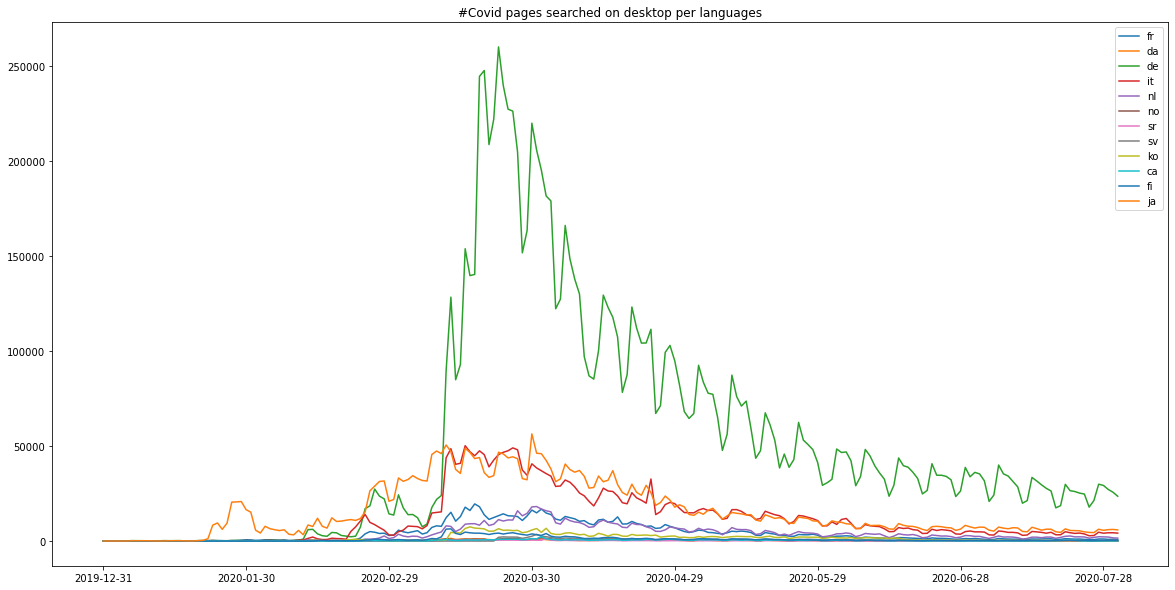

In [22]:
plt.figure(figsize=(20, 10))
for language in interventions['lang']:
    #Compute the difference between year t and year t-1
    covid_pages_desktop[language]["increase"] = covid_pages_desktop[language][0]-covid_pages_desktop[language][0].shift(1)
    print("Max increase search covid pages in {} appears the {}".format(language,covid_pages_desktop[language]["increase"].idxmax()))
    
    #Compare the date with the higher increase with the lockdown date
    print("Difference in days: {}".format(covid_pages_desktop[language]["increase"].idxmax()-interventions[interventions["lang"]==language]["Lockdown"]))
    
    #Plot the evolution of the number of pages search on desktop per language
    if (language != "en"):
        plt.plot(covid_pages_desktop[language][0],label=str(language))
plt.legend()
plt.title("#Covid pages searched on desktop per languages")
skip = 30 #To show only the date on x-axis every month
plt.xticks(covid_pages_mobile[language].index[::skip])
plt.show()

Max increase search covid pages in fr appears the 2020-03-12 00:00:00
Difference in days: 0   -5 days
Name: Lockdown, dtype: timedelta64[ns]
Max increase search covid pages in da appears the 2020-03-11 00:00:00
Difference in days: 1   -7 days
Name: Lockdown, dtype: timedelta64[ns]
Max increase search covid pages in de appears the 2020-03-12 00:00:00
Difference in days: 2   -10 days
Name: Lockdown, dtype: timedelta64[ns]
Max increase search covid pages in it appears the 2020-03-12 00:00:00
Difference in days: 3   1 days
Name: Lockdown, dtype: timedelta64[ns]
Max increase search covid pages in nl appears the 2020-03-27 00:00:00
Difference in days: 4   NaT
Name: Lockdown, dtype: timedelta64[ns]
Max increase search covid pages in no appears the 2020-03-11 00:00:00
Difference in days: 5   -13 days
Name: Lockdown, dtype: timedelta64[ns]
Max increase search covid pages in sr appears the 2020-03-29 00:00:00
Difference in days: 6   8 days
Name: Lockdown, dtype: timedelta64[ns]
Max increase sear

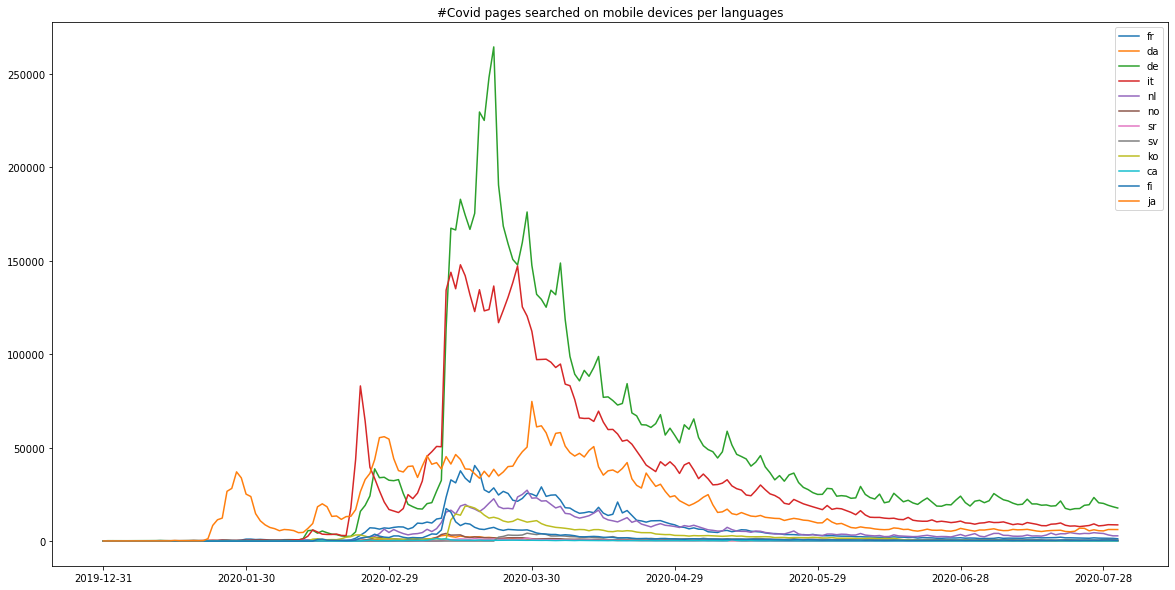

In [23]:
plt.figure(figsize=(20, 10))
for language in interventions['lang']:
    #Compute the difference between year t and year t-1
    covid_pages_mobile[language]["increase"] = covid_pages_mobile[language][0]-covid_pages_mobile[language][0].shift(1)
    print("Max increase search covid pages in {} appears the {}".format(language, covid_pages_mobile[language]["increase"].idxmax()))
    
    #Compare the date with the higher increase with the lockdown date
    print("Difference in days: {}".format(covid_pages_mobile[language]["increase"].idxmax()-interventions[interventions["lang"]==language]["Lockdown"]))
    
    #Plot the evolution of the number of pages search on mobile devices per language
    if (language != "en"):
        plt.plot(covid_pages_mobile[language][0],label=str(language))
plt.legend()
plt.title("#Covid pages searched on mobile devices per languages")
skip = 30
plt.xticks(covid_pages_mobile[language].index[::skip])
plt.show()

### Check for stationarity of timeseries
We want to look at the manner in which the timeseries changes is constant or not. For this we can user the Dickey Fuller test to check for stationarity in our timeseries, with the null hypothesis that there is no stationarity.   

1. Desktop searches

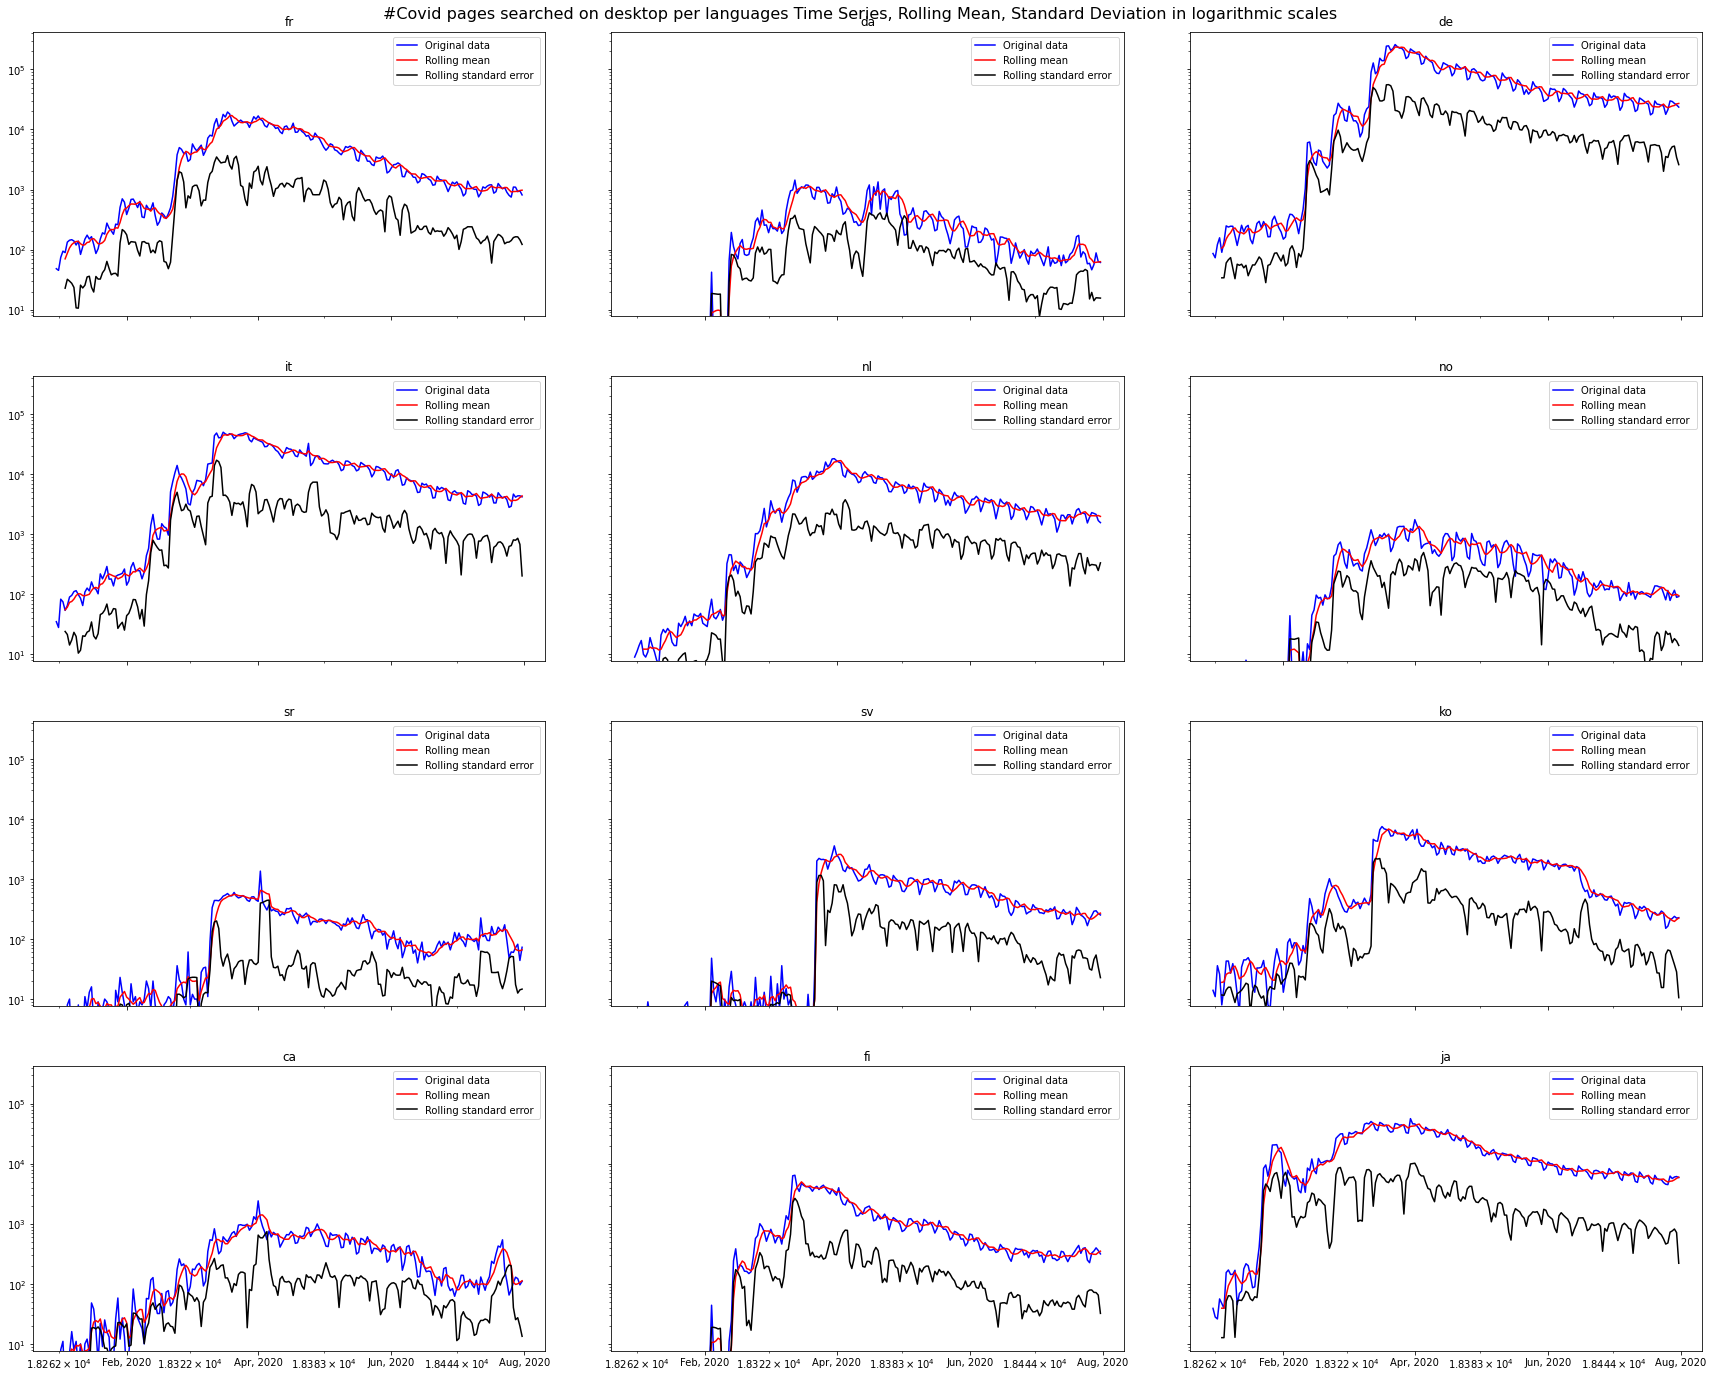

In [35]:
import matplotlib.dates as mdates

fig, axs = plt.subplots(4, 3, sharey = True, sharex = True)
fig.set_figwidth(25)
fig.set_figheight(20)
fig.tight_layout(pad=5.0)
half_year_locator = mdates.MonthLocator(interval=2)
month_year_formatter = mdates.DateFormatter('%b, %Y') 
monthly_locator = mdates.MonthLocator()
fig.suptitle("#Covid pages searched on desktop per languages Time Series, Rolling Mean, Standard Deviation in logarithmic scales", fontsize=16)


x = 0
y = 0
for language in interventions['lang']:
    if (language != "en"):
        #Compute the rolling mean for each country over 5 days
        covid_pages_desktop[language]["rolling_mean"] = covid_pages_desktop[language][0].rolling(5).mean()
    
        #Compute the rolling standard error for each country over 5 days
        covid_pages_desktop[language]["rolling_std"] = covid_pages_desktop[language][0].rolling(5).std()

       

        #Plot the evolution of the number of pages search on desktop per language
        axs[x, y].loglog(covid_pages_desktop[language][0],label='Original data',  color="blue")
        axs[x, y].loglog(covid_pages_desktop[language]["rolling_mean"],label='Rolling mean',  color="red")
        axs[x, y].loglog(covid_pages_desktop[language]["rolling_std"],label='Rolling standard error ',  color="black")
        axs[x, y].xaxis.set_major_locator(half_year_locator)
        axs[x, y].xaxis.set_minor_locator(monthly_locator)
        axs[x, y].xaxis.set_major_formatter(month_year_formatter)
        axs[x, y].set_title(str(language))
        axs[x, y].legend()

        
        #print('x equals {} and y equals {}'.format(x,y))
    
        y = y +1
        if y == 3:
            y = 0
            x = x +1




Now let's apply the test

In [39]:
from statsmodels.tsa.stattools import adfuller

# Pass the dataframe into the adfuller method
adfuller_df_desktop = pd.DataFrame({"Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print('Dickey Fuller test for desktop covid related searches:')
for language in interventions['lang']:
    if (language != "en"):
        df = covid_pages_desktop[language][0]
        adft = adfuller(df,autolag="AIC")

        output_df = pd.DataFrame({str(language):[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']] })
        adfuller_df_desktop = pd.concat([adfuller_df_desktop, output_df], axis=1)

adfuller_df_desktop

Dickey Fuller test for desktop covid related searches:


,Metric,fr,da,de,it,nl,no,sr,sv,ko,ca,fi,ja
0,Test Statistics,-1.611770,-2.076265,-2.149813,-1.870221,-2.088159,-1.477981,-1.906542,-2.433149,-1.926128,-1.627028,-1.931338,-1.858926
1,p-value,0.477047,0.254165,0.224962,0.346197,0.249303,0.544374,0.328990,0.132598,0.319871,0.469047,0.317465,0.351624
2,No. of lags used,15.000000,15.000000,10.000000,7.000000,15.000000,15.000000,3.000000,9.000000,9.000000,10.000000,6.000000,14.000000
3,Number of observations used,198.000000,198.000000,203.000000,206.000000,198.000000,198.000000,210.000000,204.000000,204.000000,203.000000,207.000000,199.000000
4,critical value (1%),-3.463815,-3.463815,-3.462980,-3.462499,-3.463815,-3.463815,-3.461879,-3.462818,-3.462818,-3.462980,-3.462342,-3.463645
5,critical value (5%),-2.876251,-2.876251,-2.875885,-2.875675,-2.876251,-2.876251,-2.875404,-2.875815,-2.875815,-2.875885,-2.875606,-2.876176
6,critical value (10%),-2.574611,-2.574611,-2.574416,-2.574304,-2.574611,-2.574611,-2.574159,-2.574379,-2.574379,-2.574416,-2.574267,-2.574572


2. Mobile searches

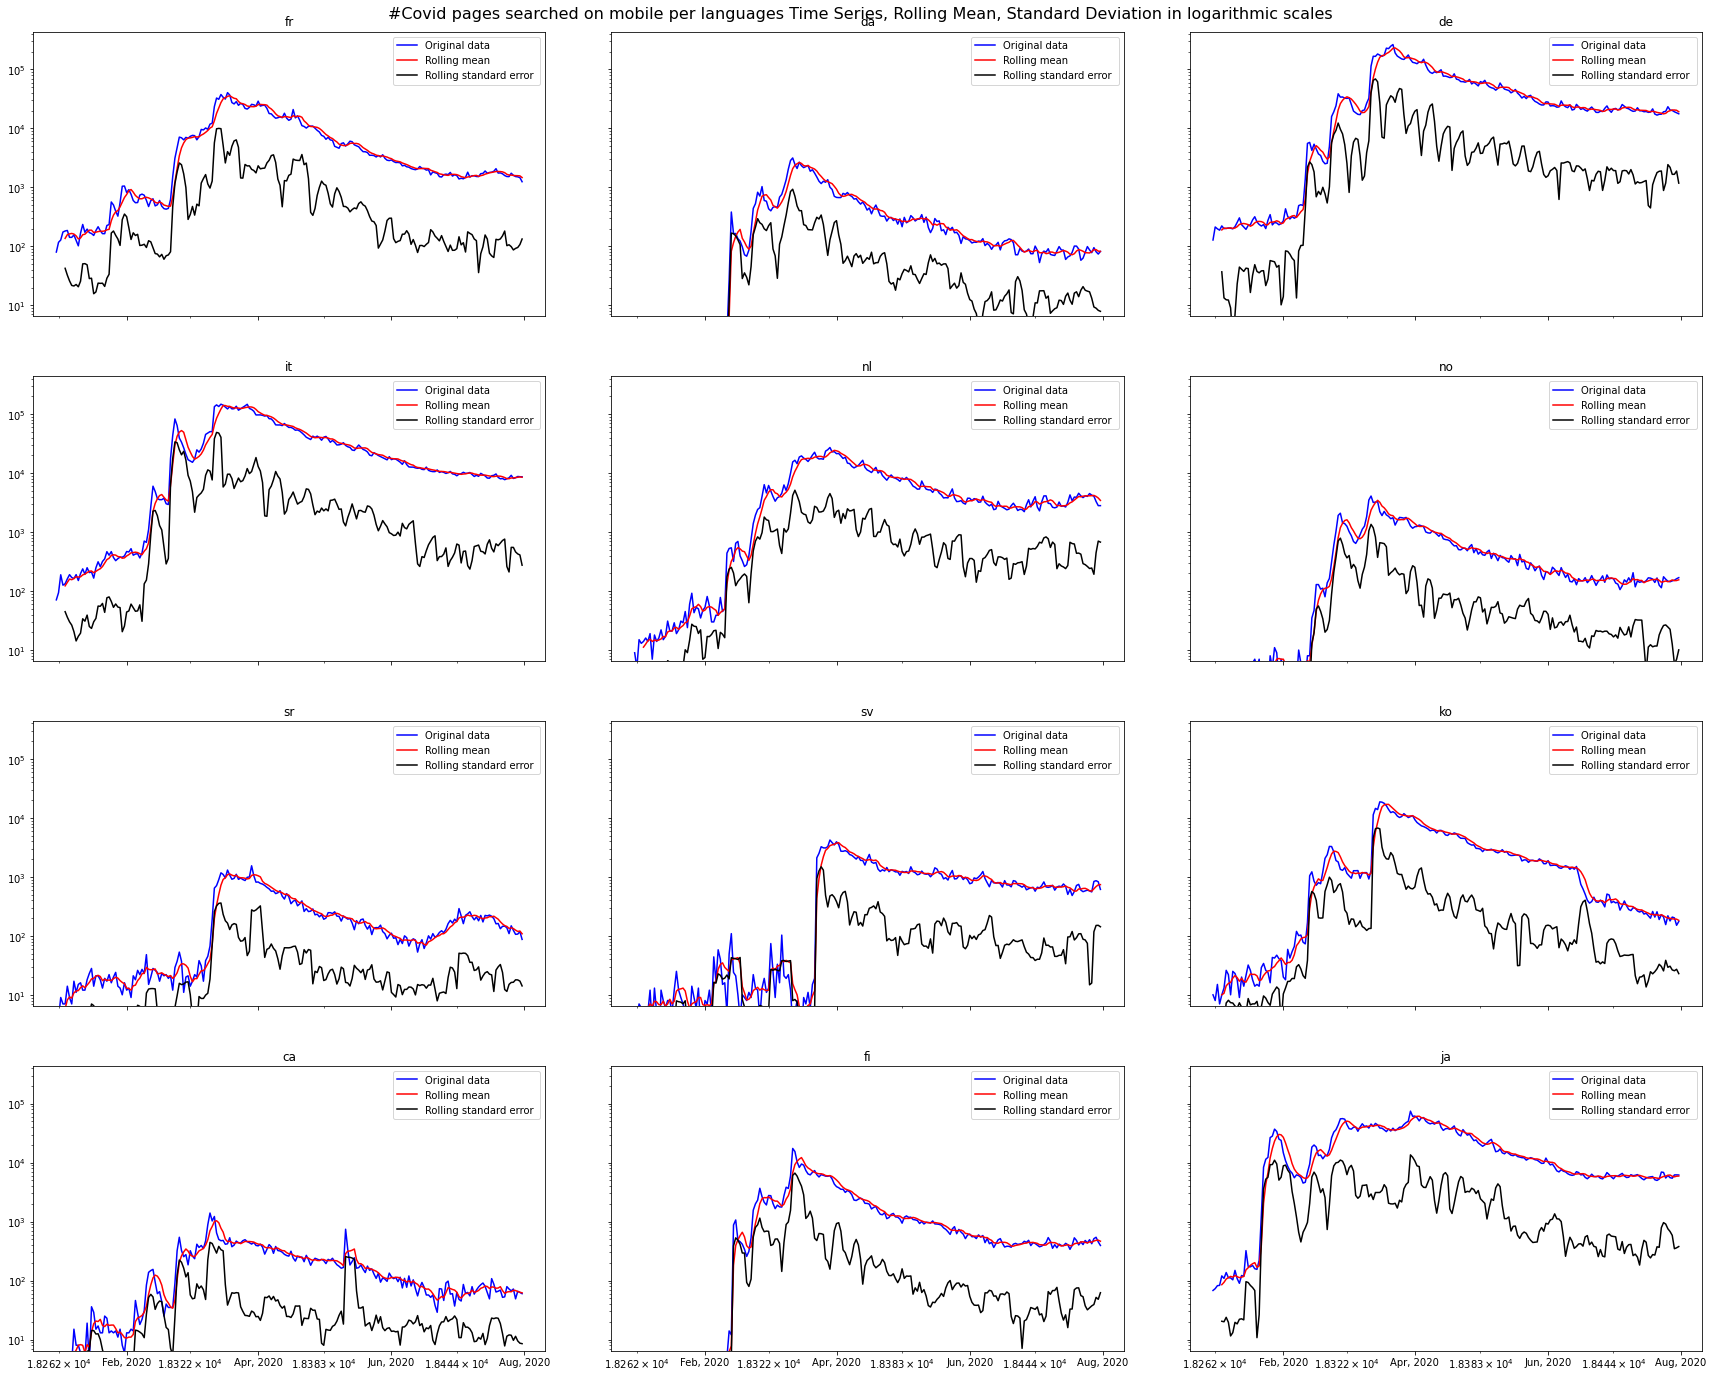

In [36]:

fig, axs = plt.subplots(4, 3, sharey = True, sharex = True)
fig.set_figwidth(25)
fig.set_figheight(20)
fig.tight_layout(pad=5.0)
half_year_locator = mdates.MonthLocator(interval=2)
month_year_formatter = mdates.DateFormatter('%b, %Y') 
monthly_locator = mdates.MonthLocator()
fig.suptitle("#Covid pages searched on mobile per languages Time Series, Rolling Mean, Standard Deviation in logarithmic scales", fontsize=16)


x = 0
y = 0
for language in interventions['lang']:
    if (language != "en"):
        #Compute the rolling mean for each country over 5 days
        covid_pages_mobile[language]["rolling_mean"] = covid_pages_mobile[language][0].rolling(5).mean()
    
        #Compute the rolling standard error for each country over 5 days
        covid_pages_mobile[language]["rolling_std"] = covid_pages_mobile[language][0].rolling(5).std()

       

        #Plot the evolution of the number of pages search on desktop per language
        axs[x, y].loglog(covid_pages_mobile[language][0],label='Original data',  color="blue")
        axs[x, y].loglog(covid_pages_mobile[language]["rolling_mean"],label='Rolling mean',  color="red")
        axs[x, y].loglog(covid_pages_mobile[language]["rolling_std"],label='Rolling standard error ',  color="black")
        axs[x, y].xaxis.set_major_locator(half_year_locator)
        axs[x, y].xaxis.set_minor_locator(monthly_locator)
        axs[x, y].xaxis.set_major_formatter(month_year_formatter)
        axs[x, y].set_title(str(language))
        axs[x, y].legend()

        
        #print('x equals {} and y equals {}'.format(x,y))
    
        y = y +1
        if y == 3:
            y = 0
            x = x +1



Now let's apply the test

In [43]:
# Pass the dataframe into the adfuller method
adfuller_df_mobile = pd.DataFrame({"Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", "critical value (1%)", "critical value (5%)", "critical value (10%)"]})

print('Dickey Fuller test for mobile covid related searches:')
for language in interventions['lang']:
    if (language != "en"):
        df = covid_pages_mobile[language][0]
        adft = adfuller(df,autolag="AIC")

        output_df = pd.DataFrame({str(language):[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']] })
        adfuller_df_mobile = pd.concat([adfuller_df_mobile, output_df], axis=1)
adfuller_df_mobile

Dickey Fuller test for mobile covid related searches:


,Metric,fr,da,de,it,nl,no,sr,sv,ko,ca,fi,ja
0,Test Statistics,-1.523275,-2.052919,-1.751455,-1.807033,-2.161752,-1.950262,-1.999605,-1.928467,-2.022056,-3.544568,-2.286031,-1.703444
1,p-value,0.521968,0.263862,0.404815,0.376975,0.220419,0.308798,0.286746,0.318790,0.276987,0.006914,0.176513,0.429339
2,No. of lags used,15.000000,1.000000,11.000000,1.000000,15.000000,14.000000,3.000000,0.000000,13.000000,0.000000,2.000000,0.000000
3,Number of observations used,198.000000,212.000000,202.000000,212.000000,198.000000,199.000000,210.000000,213.000000,200.000000,213.000000,211.000000,213.000000
4,critical value (1%),-3.463815,-3.461578,-3.463144,-3.461578,-3.463815,-3.463645,-3.461879,-3.461429,-3.463476,-3.461429,-3.461727,-3.461429
5,critical value (5%),-2.876251,-2.875272,-2.875957,-2.875272,-2.876251,-2.876176,-2.875404,-2.875207,-2.876102,-2.875207,-2.875337,-2.875207
6,critical value (10%),-2.574611,-2.574089,-2.574455,-2.574089,-2.574611,-2.574572,-2.574159,-2.574054,-2.574532,-2.574054,-2.574124,-2.574054


Combined

In [144]:
# Pass the dataframe into the adfuller method
adfuller_df_pages = pd.DataFrame({"Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", "critical value (1%)", "critical value (5%)", "critical value (10%)"]})

print('Dickey Fuller test for overall covid related searches:')
for language in interventions['lang']:
    if (language != "en"):
        df = covid_pages_mobile[language][0] + covid_pages_desktop[language][0]
        adft = adfuller(df,autolag="AIC")

        output_df = pd.DataFrame({str(language):[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']] })
        adfuller_df_pages = pd.concat([adfuller_df_pages, output_df], axis=1)
adfuller_df_pages

Dickey Fuller test for overall covid related searches:


,Metric,fr,da,de,it,nl,no,sr,sv,ko,ca,fi,ja
0,Test Statistics,-1.568566,-2.032555,-2.641411,-1.798778,-1.522589,-1.743299,-2.183279,-2.643787,-2.587318,-1.680846,-2.178340,-1.584466
1,p-value,0.499362,0.272484,0.084737,0.381069,0.522309,0.408953,0.212370,0.084281,0.095647,0.441007,0.214201,0.491392
2,No. of lags used,15.000000,2.000000,7.000000,3.000000,8.000000,14.000000,4.000000,6.000000,3.000000,7.000000,3.000000,0.000000
3,Number of observations used,176.000000,189.000000,184.000000,188.000000,183.000000,177.000000,187.000000,185.000000,188.000000,184.000000,188.000000,191.000000
4,critical value (1%),-3.468062,-3.465431,-3.466398,-3.465620,-3.466598,-3.467845,-3.465812,-3.466201,-3.465620,-3.466398,-3.465620,-3.465059
5,critical value (5%),-2.878106,-2.876957,-2.877380,-2.877040,-2.877467,-2.878012,-2.877123,-2.877293,-2.877040,-2.877380,-2.877040,-2.876794
6,critical value (10%),-2.575602,-2.574988,-2.575214,-2.575032,-2.575260,-2.575551,-2.575077,-2.575168,-2.575032,-2.575214,-2.575032,-2.574901


### Check for autocorrelation

1. Desktop searches

In [157]:
autocorr_desktop = pd.DataFrame({"Autocorrelation":["One day Lag:","Three day Lag:","Ten day Lag","One Month Lag: "]})

print('Autocorrelation for desktop covid related searches:')
for language in interventions['lang']:
    if (language != "en"):
        df = covid_pages_desktop[language][0]
        autocorrelation_lag1 = df.autocorr(lag=1)
        autocorrelation_lag3 = df.autocorr(lag=3)
        autocorrelation_lag10 = df.autocorr(lag=10)
        autocorrelation_lag30 = df.autocorr(lag=30)

        output_df = pd.DataFrame({str(language):[autocorrelation_lag1, autocorrelation_lag3,autocorrelation_lag10,autocorrelation_lag30] })
        autocorr_desktop = pd.concat([autocorr_desktop, output_df], axis=1)
autocorr_desktop

Autocorrelation for desktop covid related searches:


,Autocorrelation,fr,da,de,it,nl,no,sr,sv,ko,ca,fi,ja
0,One day Lag:,0.972707,0.874591,0.963964,0.969452,0.964837,0.900809,0.835514,0.937444,0.954027,0.881608,0.945644,0.962768
1,Three day Lag:,0.938418,0.794340,0.918572,0.928174,0.920278,0.741997,0.790157,0.802505,0.910050,0.772429,0.863202,0.919553
2,Ten day Lag,0.806925,0.559232,0.699373,0.746688,0.774014,0.616309,0.603378,0.516978,0.684384,0.629672,0.671115,0.809608
3,One Month Lag:,0.256011,0.269984,0.129020,0.178705,0.207985,0.260065,0.049888,0.127906,0.166597,0.257166,0.052732,0.321374


2. Mobile searches

In [158]:
autocorr_mobile  = pd.DataFrame({"Autocorrelation":["One day Lag:","Three day Lag:","Ten day Lag","One Month Lag: "]})
print('Autocorrelation for mobile covid related searches:')

for language in interventions['lang']:
    if (language != "en"):
        df = covid_pages_mobile[language][0]
        autocorrelation_lag1 = df.autocorr(lag=1)
        autocorrelation_lag3 = df.autocorr(lag=3)
        autocorrelation_lag10 = df.autocorr(lag=10)
        autocorrelation_lag30 = df.autocorr(lag=30)

        output_df = pd.DataFrame({str(language):[autocorrelation_lag1, autocorrelation_lag3,autocorrelation_lag10,autocorrelation_lag30] })
        autocorr_mobile = pd.concat([autocorr_mobile, output_df], axis=1)
autocorr_mobile

Autocorrelation for mobile covid related searches:


,Autocorrelation,fr,da,de,it,nl,no,sr,sv,ko,ca,fi,ja
0,One day Lag:,0.978073,0.971887,0.978402,0.977987,0.981720,0.960093,0.962004,0.968910,0.973769,0.889460,0.924467,0.976072
1,Three day Lag:,0.937578,0.896204,0.914190,0.924368,0.940653,0.849059,0.911041,0.902011,0.892377,0.731498,0.786595,0.918886
2,Ten day Lag,0.746222,0.607095,0.659724,0.738779,0.798233,0.618667,0.656322,0.572981,0.592991,0.550630,0.575560,0.744212
3,One Month Lag:,0.169371,0.028092,0.090764,0.157883,0.167413,0.088771,-0.016705,0.097823,0.140830,0.151276,0.026205,0.464570


3. Combined searches

In [143]:
autocorr_views  = pd.DataFrame({"Autocorrelation":["One day Lag:","Three day Lag:","Ten day Lag","One Month Lag: "]})
print('Autocorrelation for overall covid related searches:')

for language in interventions['lang']:
    if (language != "en"):
        df = covid_pages_mobile[language][0] + covid_pages_desktop[language][0]
        autocorrelation_lag1 = df.autocorr(lag=1)
        autocorrelation_lag3 = df.autocorr(lag=3)
        autocorrelation_lag10 = df.autocorr(lag=10)
        autocorrelation_lag30 = df.autocorr(lag=30)

        output_df = pd.DataFrame({str(language):[autocorrelation_lag1, autocorrelation_lag3,autocorrelation_lag10,autocorrelation_lag30] })
        autocorr_views = pd.concat([autocorr_views, output_df], axis=1)
autocorr_views

Autocorrelation for overall covid related searches:


,Autocorrelation,fr,da,de,it,nl,no,sr,sv,ko,ca,fi,ja
0,One day Lag:,0.979247,0.961477,0.980595,0.978163,0.983793,0.956523,0.953337,0.966803,0.971241,0.892764,0.931130,0.977504
1,Three day Lag:,0.943367,0.890118,0.936689,0.926904,0.948363,0.844870,0.910651,0.873648,0.898593,0.769571,0.806827,0.933269
2,Ten day Lag,0.757523,0.607364,0.680922,0.722690,0.788162,0.644843,0.641400,0.521934,0.598437,0.634796,0.591261,0.820332
3,One Month Lag:,0.117311,0.039958,0.003657,0.061329,0.057626,0.050302,-0.089210,0.002826,0.069338,0.124911,-0.032506,0.361368


### Check for Decomposition

1. Desktop related searches

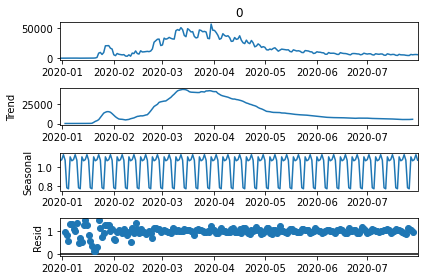

In [103]:
from statsmodels.tsa.seasonal import seasonal_decompose
# We choose an multiplicative model as the seasonality depends on the trend
plt.figure(figsize=(20, 10))
for language in interventions['lang']:
    if (language == "ja"):
        df = covid_pages_desktop[language][0]
        decompose = seasonal_decompose(df,model='multiplicative', period=7) ## Change the decompsition period 7 shows best pattern multiplicative
        decompose.plot()
        plt.show()

From the plot we can clearly see an overall increase in covid related pageviews at the beginning of 2020. We can also observe a seasonality pattern with a rise and fall each week. 

2. Mobile related searches

<Figure size 1440x720 with 0 Axes>

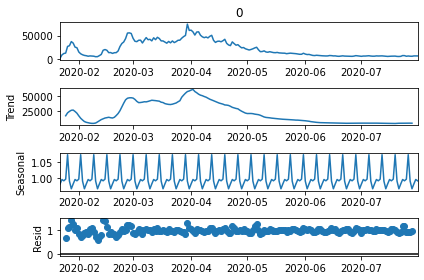

In [151]:
from statsmodels.tsa.seasonal import seasonal_decompose
# We choose an multiplicative model as the seasonality depends on the trend
plt.figure(figsize=(20, 10))
for language in interventions['lang']:
    if (language == "ja"):
        df = covid_pages_mobile[language][0]
        decompose = seasonal_decompose(df,model='multiplicative', period=7) ## Change the decompsition period 7 shows best pattern multiplicative
        decompose.plot()
        plt.show()

3. Combined searches

<Figure size 1440x720 with 0 Axes>

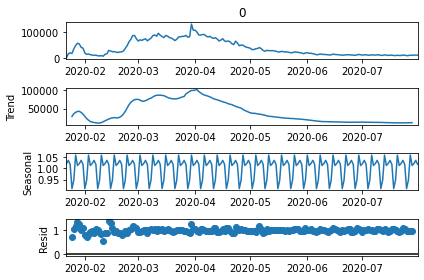

In [150]:
from statsmodels.tsa.seasonal import seasonal_decompose
# We choose an multiplicative model as the seasonality depends on the trend
plt.figure(figsize=(20, 10))
for language in interventions['lang']:
    if (language == "ja"):
        df = covid_pages_mobile[language][0] + covid_pages_desktop[language][0]
        decompose = seasonal_decompose(df,model='multiplicative', period=7) ## Change the decompsition period 7 shows best pattern multiplicative
        decompose.plot()
        plt.show()

## Covid cases and deaths


In [63]:
# Downloading the csv file from your GitHub account
death_url = "https://github.com/owid/covid-19-data/blob/master/public/data/jhu/new_deaths.csv?raw=true" # Make sure the url is the raw version of the file on GitHub
cases_url = "https://github.com/owid/covid-19-data/blob/master/public/data/jhu/new_cases.csv?raw=true"

# Reading the downloaded content and turning it into a pandas dataframe
deaths = pd.read_csv(death_url,index_col=0)
cases = pd.read_csv(cases_url,index_col=0)

In [131]:
#Keep only values until July
deaths = deaths[deaths.index < '2020-08-01']
cases = cases[cases.index < '2020-08-01']

countries = ["France", "Denmark", "Germany", "Italy", "Netherlands", "Norway", "Serbia", "Sweden", "South Korea", "Finland", "Japan"]

deaths = deaths[countries]
cases = cases[countries]

In [162]:
#Replace NaN values with 0 
deaths = deaths.fillna(0)
cases = cases.fillna(0)

### Stationarity tests

4. Covid deaths

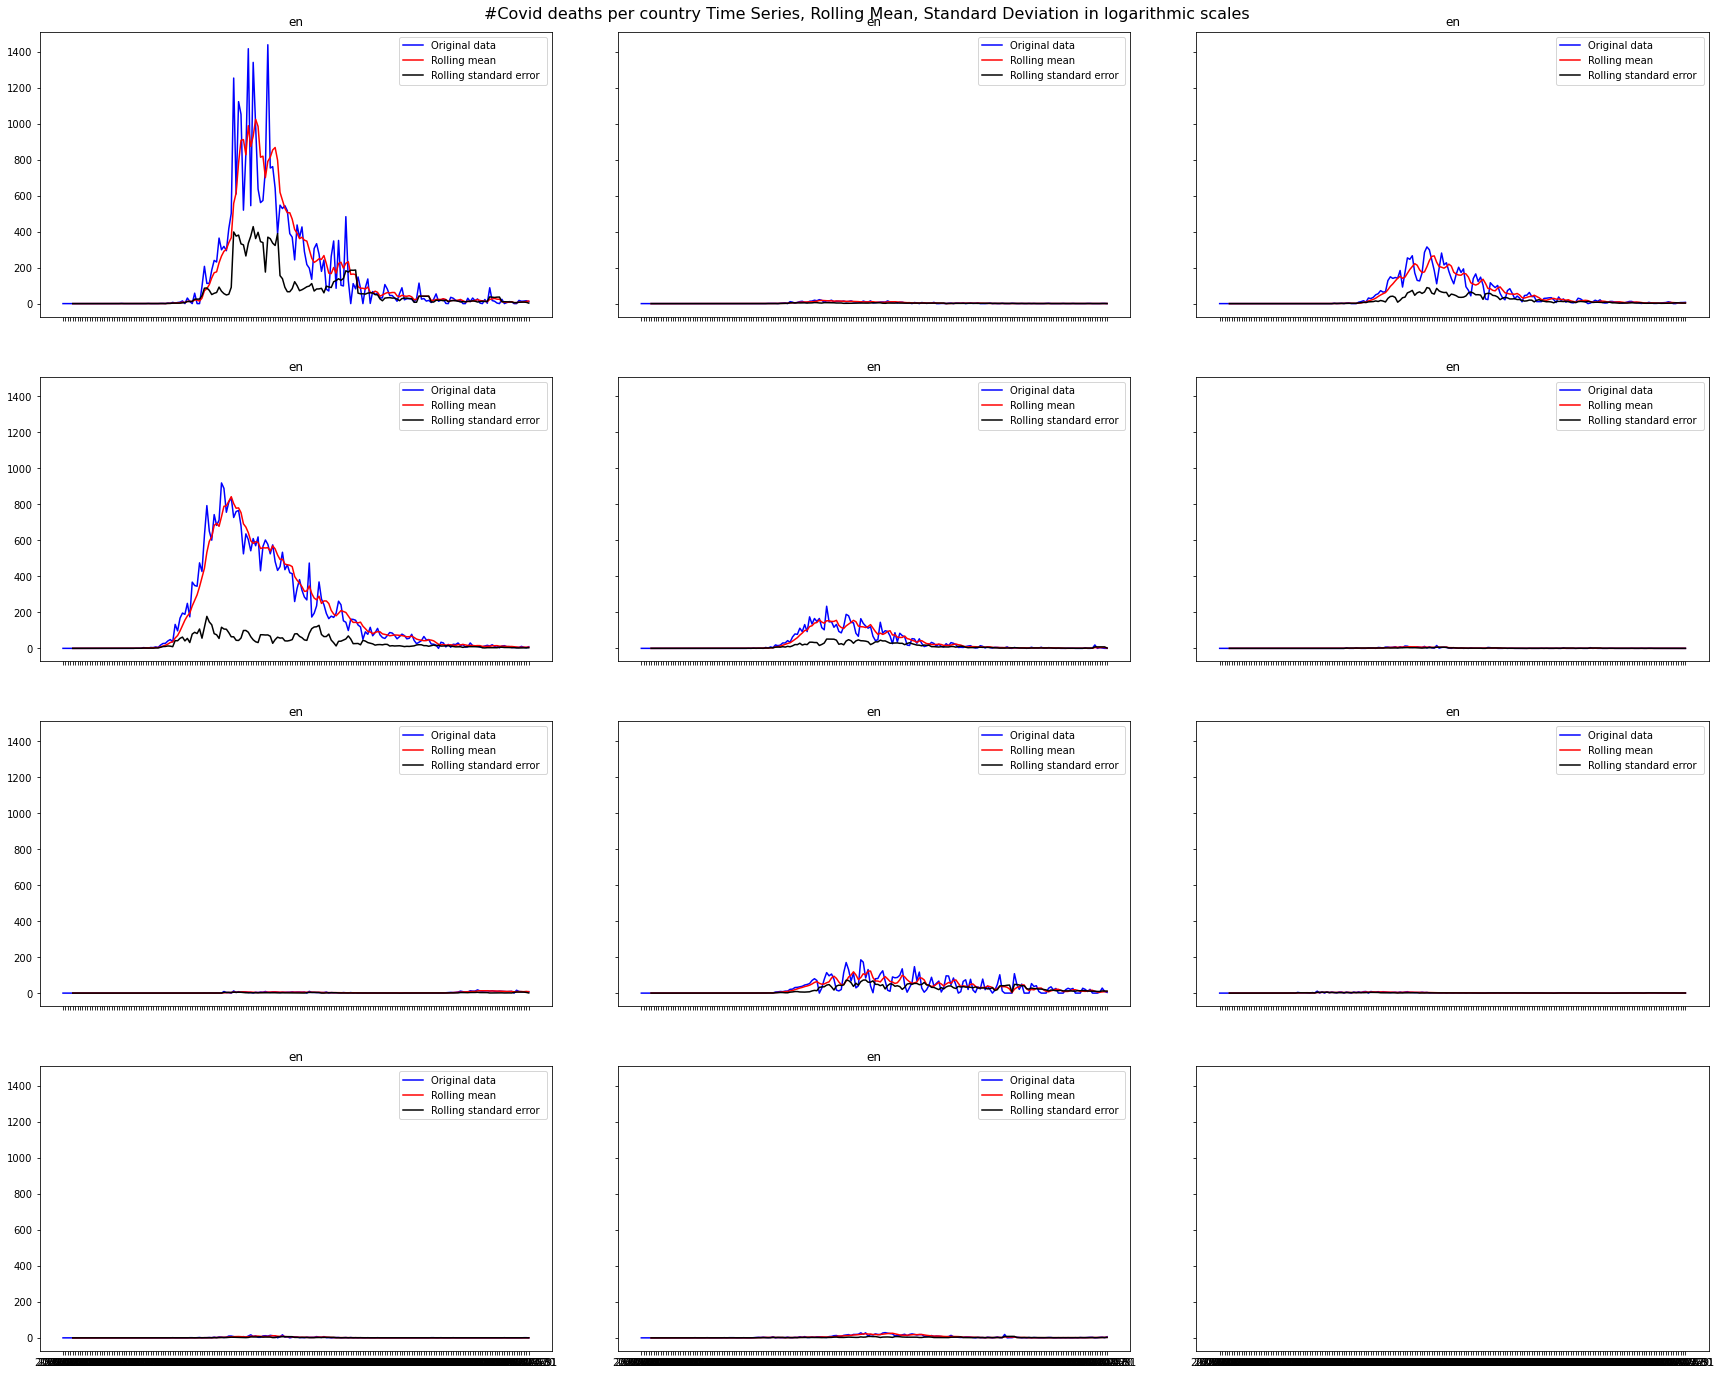

In [169]:

fig, axs = plt.subplots(4, 3, sharey = True, sharex = True)
fig.set_figwidth(25)
fig.set_figheight(20)
fig.tight_layout(pad=5.0)
#half_year_locator = mdates.MonthLocator(interval=2)
#month_year_formatter = mdates.DateFormatter('%b, %Y') 
#monthly_locator = mdates.MonthLocator()
fig.suptitle("#Covid deaths per country Time Series, Rolling Mean, Standard Deviation in logarithmic scales", fontsize=16)


x = 0
y = 0
for country in countries:
    #Compute the rolling mean for each country over 5 days
    rolling_mean = pd.DataFrame(deaths[country].rolling(5).mean())

    #Compute the rolling standard error for each country over 5 days
    rolling_std = pd.DataFrame(deaths[country].rolling(5).std())



    #Plot the evolution of the number of pages search on desktop per language
    axs[x, y].plot(deaths[country],label='Original data',  color="blue")
    axs[x, y].plot(rolling_mean,label='Rolling mean',  color="red")
    axs[x, y].plot(rolling_std,label='Rolling standard error ',  color="black")
    #axs[x, y].xaxis.set_major_locator(half_year_locator)
    #axs[x, y].xaxis.set_minor_locator(monthly_locator)
    #axs[x, y].xaxis.set_major_formatter(month_year_formatter)
    axs[x, y].set_title(str(language))
    axs[x, y].legend()


    #print('x equals {} and y equals {}'.format(x,y))
    y = y +1
    if y == 3:
        y = 0
        x = x +1


In [90]:
# Pass the dataframe into the adfuller method
adfuller_df_deaths = pd.DataFrame({"Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", "critical value (1%)", "critical value (5%)", "critical value (10%)"]})

print('Dickey Fuller test for covid deaths per country:')
for country in countries:
    df = deaths[country]
    adft = adfuller(df,autolag="AIC")

    output_df = pd.DataFrame({str(country):[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']] })
    adfuller_df_deaths = pd.concat([adfuller_df_deaths, output_df], axis=1)
adfuller_df_deaths

Dickey Fuller test for covid deaths per country:


,Metric,France,Denmark,Germany,Italy,Netherlands,Norway,Serbia,Finland,South Korea,Japan,Sweden
0,Test Statistics,-2.449121,-1.767655,-3.396082,-2.499441,-2.089323,-2.299427,-1.674540,-2.004059,-1.553787,-1.846482,-1.317037
1,p-value,0.128349,0.396634,0.011093,0.115610,0.248830,0.172153,0.444276,0.284796,0.506756,0.357641,0.621342
2,No. of lags used,10.000000,9.000000,14.000000,9.000000,14.000000,10.000000,7.000000,13.000000,11.000000,13.000000,9.000000
3,Number of observations used,181.000000,182.000000,177.000000,182.000000,177.000000,181.000000,184.000000,178.000000,180.000000,178.000000,182.000000
4,critical value (1%),-3.467005,-3.466800,-3.467845,-3.466800,-3.467845,-3.467005,-3.466398,-3.467632,-3.467211,-3.467632,-3.466800
5,critical value (5%),-2.877644,-2.877555,-2.878012,-2.877555,-2.878012,-2.877644,-2.877380,-2.877918,-2.877735,-2.877918,-2.877555
6,critical value (10%),-2.575355,-2.575308,-2.575551,-2.575308,-2.575551,-2.575355,-2.575214,-2.575501,-2.575403,-2.575501,-2.575308


5. Covid deaths

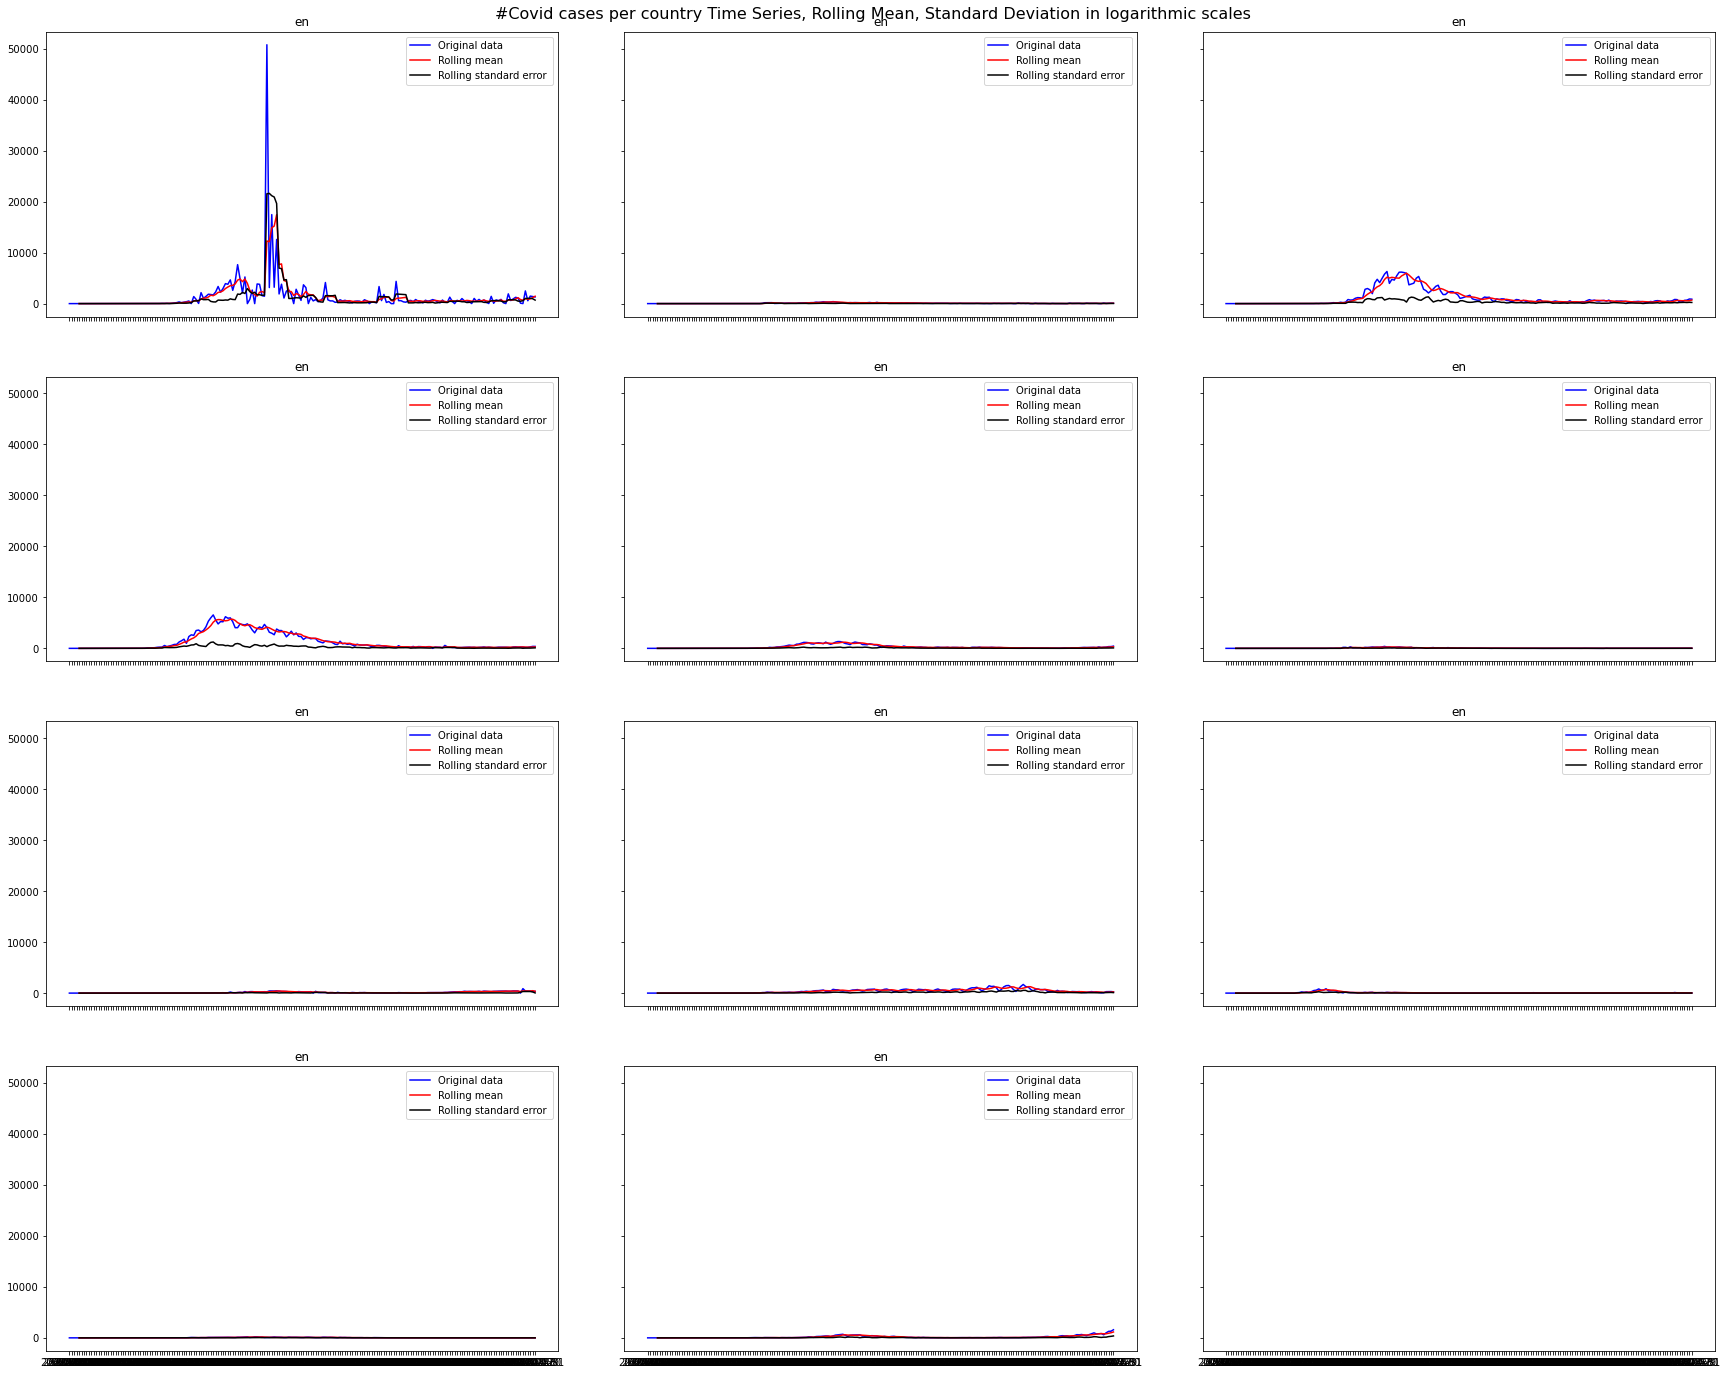

In [170]:

fig, axs = plt.subplots(4, 3, sharey = True, sharex = True)
fig.set_figwidth(25)
fig.set_figheight(20)
fig.tight_layout(pad=5.0)
#half_year_locator = mdates.MonthLocator(interval=2)
#month_year_formatter = mdates.DateFormatter('%b, %Y') 
#monthly_locator = mdates.MonthLocator()
fig.suptitle("#Covid cases per country Time Series, Rolling Mean, Standard Deviation in logarithmic scales", fontsize=16)


x = 0
y = 0
for country in countries:
    #Compute the rolling mean for each country over 5 days
    rolling_mean = pd.DataFrame(cases[country].rolling(5).mean())

    #Compute the rolling standard error for each country over 5 days
    rolling_std = pd.DataFrame(cases[country].rolling(5).std())



    #Plot the evolution of the number of pages search on desktop per language
    axs[x, y].plot(cases[country],label='Original data',  color="blue")
    axs[x, y].plot(rolling_mean,label='Rolling mean',  color="red")
    axs[x, y].plot(rolling_std,label='Rolling standard error ',  color="black")
    #axs[x, y].xaxis.set_major_locator(half_year_locator)
    #axs[x, y].xaxis.set_minor_locator(monthly_locator)
    #axs[x, y].xaxis.set_major_formatter(month_year_formatter)
    axs[x, y].set_title(str(language))
    axs[x, y].legend()


    #print('x equals {} and y equals {}'.format(x,y))
    y = y +1
    if y == 3:
        y = 0
        x = x +1



In [92]:
# Pass the dataframe into the adfuller method
adfuller_df_cases = pd.DataFrame({"Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", "critical value (1%)", "critical value (5%)", "critical value (10%)"]})

print('Dickey Fuller test for covid cases per country:')
for country in countries:
    df = cases[country]
    adft = adfuller(df,autolag="AIC")

    output_df = pd.DataFrame({str(country):[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']] })
    adfuller_df_cases = pd.concat([adfuller_df_cases, output_df], axis=1)
adfuller_df_cases

Dickey Fuller test for covid cases per country:


,Metric,France,Denmark,Germany,Italy,Netherlands,Norway,Serbia,Finland,South Korea,Japan,Sweden
0,Test Statistics,-4.102096,-1.805142,-3.423589,-2.807371,-2.192648,-2.161003,-1.045424,-1.839208,-3.593439,0.989685,-2.017333
1,p-value,0.000961,0.377912,0.010181,0.057229,0.208925,0.220702,0.736339,0.361177,0.005888,0.994156,0.279025
2,No. of lags used,3.000000,14.000000,9.000000,8.000000,10.000000,14.000000,3.000000,15.000000,8.000000,8.000000,14.000000
3,Number of observations used,188.000000,177.000000,182.000000,183.000000,181.000000,177.000000,188.000000,176.000000,183.000000,183.000000,177.000000
4,critical value (1%),-3.465620,-3.467845,-3.466800,-3.466598,-3.467005,-3.467845,-3.465620,-3.468062,-3.466598,-3.466598,-3.467845
5,critical value (5%),-2.877040,-2.878012,-2.877555,-2.877467,-2.877644,-2.878012,-2.877040,-2.878106,-2.877467,-2.877467,-2.878012
6,critical value (10%),-2.575032,-2.575551,-2.575308,-2.575260,-2.575355,-2.575551,-2.575032,-2.575602,-2.575260,-2.575260,-2.575551


### Autocorrelation

4. Covid deaths

In [97]:
autocorr_deaths = pd.DataFrame({"Autocorrelation":["One day Lag:","Three day Lag:","Ten day Lag","One Month Lag: "]})

print('Autocorrelation for desktop covid related searches:')
for country in countries:
    df = deaths[country]
    autocorrelation_lag1 = df.autocorr(lag=1)
    autocorrelation_lag3 = df.autocorr(lag=3)
    autocorrelation_lag10 = df.autocorr(lag=10)
    autocorrelation_lag30 = df.autocorr(lag=30)

    output_df = pd.DataFrame({str(country):[autocorrelation_lag1, autocorrelation_lag3,autocorrelation_lag10,autocorrelation_lag30] })
    autocorr_deaths = pd.concat([autocorr_deaths, output_df], axis=1)
autocorr_deaths

Autocorrelation for desktop covid related searches:


,Autocorrelation,France,Denmark,Germany,Italy,Netherlands,Norway,Serbia,Finland,South Korea,Japan,Sweden
0,One day Lag:,0.814745,0.840082,0.925418,0.970318,0.893683,0.567329,0.755517,0.724476,0.453783,0.869314,0.649349
1,Three day Lag:,0.818249,0.834893,0.788754,0.954119,0.842613,0.693479,0.771575,0.628096,0.579839,0.820288,0.348250
2,Ten day Lag,0.577176,0.658416,0.665898,0.803395,0.705449,0.493987,0.603538,0.514959,0.585393,0.723298,0.246679
3,One Month Lag:,-0.030716,0.106418,0.030916,0.118225,0.064558,-0.058677,-0.133705,0.023290,0.073824,0.099508,0.078277


5. Covid cases

In [98]:
autocorr_cases = pd.DataFrame({"Autocorrelation":["One day Lag:","Three day Lag:","Ten day Lag","One Month Lag: "]})

print('Autocorrelation for desktop covid related searches:')
for country in countries:
    df = cases[country]
    autocorrelation_lag1 = df.autocorr(lag=1)
    autocorrelation_lag3 = df.autocorr(lag=3)
    autocorrelation_lag10 = df.autocorr(lag=10)
    autocorrelation_lag30 = df.autocorr(lag=30)

    output_df = pd.DataFrame({str(country):[autocorrelation_lag1, autocorrelation_lag3,autocorrelation_lag10,autocorrelation_lag30] })
    autocorr_cases = pd.concat([autocorr_cases, output_df], axis=1)
autocorr_cases

Autocorrelation for desktop covid related searches:


,Autocorrelation,France,Denmark,Germany,Italy,Netherlands,Norway,Serbia,Finland,South Korea,Japan,Sweden
0,One day Lag:,0.119039,0.900107,0.960132,0.978929,0.968778,0.845566,0.786495,0.900257,0.900369,0.960917,0.894279
1,Three day Lag:,0.144837,0.833721,0.890748,0.940737,0.908798,0.815695,0.824092,0.803748,0.810234,0.886446,0.629546
2,Ten day Lag,0.065376,0.625145,0.676651,0.790910,0.747508,0.628942,0.728609,0.699663,0.219643,0.701261,0.533565
3,One Month Lag:,-0.019987,0.095522,-0.075677,0.099894,-0.024902,-0.048518,-0.015249,0.167037,-0.090770,-0.147519,0.182663


### Check for Decomposition

4. Covid deaths

In [105]:
from statsmodels.tsa.seasonal import seasonal_decompose
# We choose an multiplicative model as the seasonality depends on the trend
plt.figure(figsize=(20, 10))
for country in countries:
    df = deaths[country]
    decompose = seasonal_decompose(df,model='multiplicative', period=7) ## Change the decompsition period 7 shows best pattern multiplicative
    decompose.plot()
    plt.show()

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

<Figure size 1440x720 with 0 Axes>

4. Covid cases

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# We choose an multiplicative model as the seasonality depends on the trend
plt.figure(figsize=(20, 10))
for country in countries:
    df = cases[country]
    decompose = seasonal_decompose(df,model='multiplicative', period=7) ## Change the decompsition period 7 shows best pattern multiplicative
    decompose.plot()
    plt.show()

## Pearson Correlation

In [140]:
from scipy import stats
language_country = dict(zip(countries,interventions['lang'].drop([9,12])))

pearson_deaths = pd.DataFrame({"Pearson correlation":["Correlation coefficient:","P-value:"]})


for country in countries:
    corr, p_value = stats.pearsonr(covid_pages_mobile[language_country[country]][0] + covid_pages_desktop[language_country[country]][0], deaths[country])
    output_df = pd.DataFrame({str(country):[corr, p_value] })
    pearson_deaths = pd.concat([pearson_deaths, output_df], axis=1)
pearson_deaths

,Pearson correlation,France,Denmark,Germany,Italy,Netherlands,Norway,Serbia,Sweden,South Korea,Finland,Japan
0,Correlation coefficient:,5.285766e-01,0.278262,4.077880e-01,8.376467e-01,7.197763e-01,3.535157e-01,0.092117,5.353597e-01,5.928191e-01,0.240089,0.140248
1,P-value:,3.270218e-15,0.000093,4.337550e-09,8.643212e-52,6.102646e-32,4.908982e-07,0.203808,1.241522e-15,1.320095e-19,0.000796,0.052350


Looking at the Pearson Correlation coefficient, we see that the ones of Italy and Netherlands are big which implies that the two time series are positively correlated and increase/decrease at the same moments.

In [142]:
from scipy import stats
language_country = dict(zip(countries,interventions['lang'].drop([9,12])))

pearson_cases = pd.DataFrame({"Pearson correlation":["Correlation coefficient:","P-value:"]})


for country in countries:
    corr, p_value = stats.pearsonr(covid_pages_mobile[language_country[country]][0] + covid_pages_desktop[language_country[country]][0], cases[country])
    output_df = pd.DataFrame({str(country):[corr, p_value] })
    pearson_cases = pd.concat([pearson_cases, output_df], axis=1)
pearson_cases

,Pearson correlation,France,Denmark,Germany,Italy,Netherlands,Norway,Serbia,Sweden,South Korea,Finland,Japan
0,Correlation coefficient:,0.267389,4.582126e-01,7.950986e-01,9.117459e-01,8.366038e-01,7.650192e-01,0.091574,3.592795e-01,0.000944,4.658323e-01,-0.041672
1,P-value:,0.000177,2.341614e-11,3.939394e-43,2.411854e-75,1.506442e-51,3.681372e-38,0.206496,3.092376e-07,0.989635,9.847602e-12,0.566036


Looking at the Pearson Correlation coefficient, we see now that it is relatively big also for Germany and Norway. This could point the fact that Norway and Germany people look more at covid page views when there was more cases but not directly when the number of deaths increases/decreases.